<font size=5 >Set up</font>

In [1]:
import h5py as h5 
import matplotlib.pyplot as plt
import numpy as np 
import gvar as gv  
import lsqfit as lsf
import os 
import hashlib
os.chdir(os.getcwd() + '/my_project') # if you do not use database, delete this line

from my_project.formfactor_fit.models import T2K_fit as formfactor_fit_T2K_fit
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true" # for jupyter to use database

<font size=5 >Theoretical prediction of energy spectrum</font>

In [2]:
file_path = os.getcwd() + '/FK_Fpi_data.h5' # put the data file inside 'my_project' folder, if no database, data file should be put in the same path as this file.
myfile = h5.File(file_path, 'r')

print([key for key in myfile]) # see what inside the data file

mpi_data = myfile['a12m310']['mpi'] # a12m310 as an example
mpi_list = [data for data in mpi_data]
mpi_array = np.array(mpi_list)

m = mpi_array.mean() # read the mass of pion from the data file
mN = 0.6577305742756179 # this is the mass of proton, you can use best fit results of E0 as the mass of proton here
L = 24 #this is the size of the box

# below are non-interacting relativistic energy spectrum from theoretical calculation
E100 = np.sqrt(m**2 + 1*(2*np.pi/L)**2) + np.sqrt(mN**2 + 1*(2*np.pi/L)**2) # E100 means a proton and a pion both have 1 unit momentum
E111 = np.sqrt(m**2 + np.sqrt(3)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(3)*(2*np.pi/L)**2)
E210 = np.sqrt(m**2 + np.sqrt(5)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(5)*(2*np.pi/L)**2)
E300 = np.sqrt(m**2 + np.sqrt(9)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(9)*(2*np.pi/L)**2)
E110 = np.sqrt(m**2 + np.sqrt(2)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(2)*(2*np.pi/L)**2)
E200 = np.sqrt(m**2 + np.sqrt(4)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(4)*(2*np.pi/L)**2)
E211 = np.sqrt(m**2 + np.sqrt(6)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(6)*(2*np.pi/L)**2)
E220 = np.sqrt(m**2 + np.sqrt(8)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(8)*(2*np.pi/L)**2)
E310 = np.sqrt(m**2 + np.sqrt(10)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(10)*(2*np.pi/L)**2)
E400 = np.sqrt(m**2 + np.sqrt(16)*(2*np.pi/L)**2) + np.sqrt(mN**2 + np.sqrt(16)*(2*np.pi/L)**2)

['a06m310L', 'a09m135', 'a09m220', 'a09m310', 'a09m350', 'a09m400', 'a12m130', 'a12m220', 'a12m220L', 'a12m220S', 'a12m310', 'a12m350', 'a12m400', 'a15m135XL', 'a15m220', 'a15m310', 'a15m350', 'a15m400']


<font size=5 >Fit results</font>

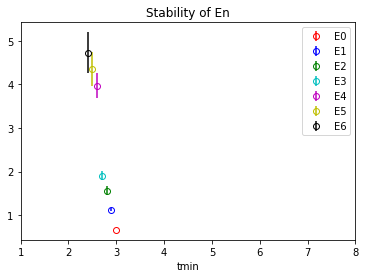

In [3]:
# from the database read the fit results and plot to check whether they are stable

tmin_list = [] # here check the stability when varying the tmin of 2pt fit as an example

E0_list = []
E0err_list = []
E1_list = []
E1err_list = []
E2_list = []
E2err_list = []
E3_list = []
E3err_list = []
E4_list = []
E4err_list = []
E5_list = []
E5err_list = []
E6_list = []
E6err_list = []

A3_list = []
A3err_list = []
V4_list = []
V4err_list = []

# use the specific values of parameters to find fit results from the database
for situation in formfactor_fit_T2K_fit.objects.filter(data_file_name='a12m310_a_avg.h5', prior_hexcode='16eefe266f7079624bea72c709a0a556', include_2pt=True, include_2pt_ps=True, include_3pt=True, include_sum=True, include_fh_ss=True, include_fh_ps=True, machine_learning=False, pt2_tmax=12, pt2_nstates=7, pt2_ps_tmin=3, pt2_ps_tmax=12, pt3_A3_tsep_min=4, pt3_V4_tsep_min=4, pt3_A3_tsep_max=11, pt3_V4_tsep_max=11, pt3_tau_cut=1, pt3_nstates=5, sum_A3_tsep_min=4, sum_V4_tsep_min=4, sum_A3_tsep_max=11, sum_V4_tsep_max=11, sum_tau_cut=1, sum_nstates=3, fh_ss_A3_tsep_min=2, fh_ss_A3_tsep_max=11, fh_ss_V4_tsep_min=3, fh_ss_V4_tsep_max=13, fh_ps_A3_tsep_min=2, fh_ps_A3_tsep_max=11, fh_ps_V4_tsep_min=3, fh_ps_V4_tsep_max=13, fh_nstates=3):
    dump_temp = bytes.fromhex(situation.data_and_results)
    data_and_results = gv.loads(dump_temp)
    
    tmin_list.append(situation.pt2_tmin)
    
    E0_list.append(data_and_results['params']['E0'].mean)
    E0err_list.append(data_and_results['params']['E0'].sdev)
    
    E1_list.append((data_and_results['params']['dE1'] + data_and_results['params']['E0']).mean)
    E1err_list.append((data_and_results['params']['dE1'] + data_and_results['params']['E0']).sdev)
    
    E2_list.append((data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).mean)
    E2err_list.append((data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).sdev)
    
    E3_list.append((data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).mean)
    E3err_list.append((data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).sdev)
    
    E4_list.append((data_and_results['params']['dE4'] + data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).mean)
    E4err_list.append((data_and_results['params']['dE4'] + data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).sdev)
    
    E5_list.append((data_and_results['params']['dE5'] + data_and_results['params']['dE4'] + data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).mean)
    E5err_list.append((data_and_results['params']['dE5'] + data_and_results['params']['dE4'] + data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).sdev)
    
    E6_list.append((data_and_results['params']['dE6'] + data_and_results['params']['dE5'] + data_and_results['params']['dE4'] + data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).mean)
    E6err_list.append((data_and_results['params']['dE6'] + data_and_results['params']['dE5'] + data_and_results['params']['dE4'] + data_and_results['params']['dE3'] + data_and_results['params']['dE2'] + data_and_results['params']['dE1'] + data_and_results['params']['E0']).sdev)
    
    A3_list.append((data_and_results['params']['A3_00']).mean)
    A3err_list.append((data_and_results['params']['A3_00']).sdev)
    V4_list.append((data_and_results['params']['V4_00']).mean)
    V4err_list.append((data_and_results['params']['V4_00']).sdev)
    
# plot fit results of En
plt.figure()
plt.errorbar(np.array(tmin_list), np.array(E0_list), yerr=np.array(E0err_list), mfc='none', fmt='or', label='E0')
plt.errorbar(np.array(tmin_list)-0.1 * np.ones(len(tmin_list)), np.array(E1_list), yerr=np.array(E1err_list), mfc='none', fmt='ob', label='E1')
plt.errorbar(np.array(tmin_list)-0.2 * np.ones(len(tmin_list)), np.array(E2_list), yerr=np.array(E2err_list), mfc='none', fmt='og', label='E2')
plt.errorbar(np.array(tmin_list)-0.3 * np.ones(len(tmin_list)), np.array(E3_list), yerr=np.array(E3err_list), mfc='none', fmt='oc', label='E3')
plt.errorbar(np.array(tmin_list)-0.4 * np.ones(len(tmin_list)), np.array(E4_list), yerr=np.array(E4err_list), mfc='none', fmt='om', label='E4')
plt.errorbar(np.array(tmin_list)-0.5 * np.ones(len(tmin_list)), np.array(E5_list), yerr=np.array(E5err_list), mfc='none', fmt='oy', label='E5')
plt.errorbar(np.array(tmin_list)-0.6 * np.ones(len(tmin_list)), np.array(E6_list), yerr=np.array(E6err_list), mfc='none', fmt='ok', label='E6')
plt.xlim([1, 8])
plt.title('Stability of En')
plt.legend(loc='upper right')
plt.xlabel('tmin')
plt.show()

<font size=5 >Prior and spectrum plots</font>

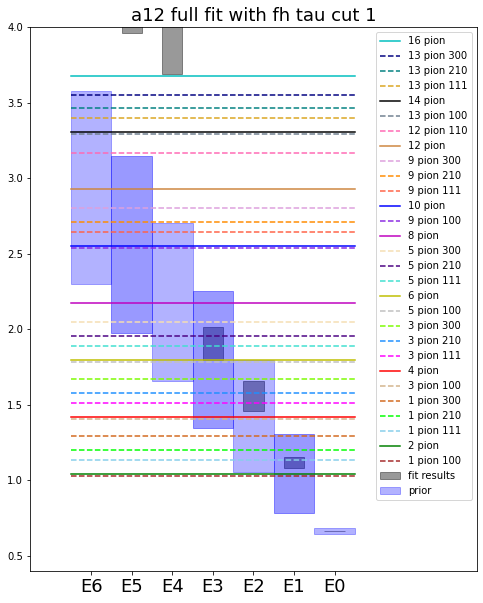

In [4]:
# read the prior of En from the database
E_prior_list = []
Eerr_prior_list = []

for situation in formfactor_fit_T2K_fit.objects.filter(data_file_name='a12m310_a_avg.h5', prior_hexcode='16eefe266f7079624bea72c709a0a556', include_2pt=True, include_2pt_ps=True, include_3pt=True, include_sum=True, include_fh_ss=True, include_fh_ps=True, machine_learning=False, pt2_tmax=12, pt2_nstates=7, pt2_ps_tmin=3, pt2_ps_tmax=12, pt3_A3_tsep_min=4, pt3_V4_tsep_min=4, pt3_A3_tsep_max=11, pt3_V4_tsep_max=11, pt3_tau_cut=1, pt3_nstates=5, sum_A3_tsep_min=4, sum_V4_tsep_min=4, sum_A3_tsep_max=11, sum_V4_tsep_max=11, sum_tau_cut=1, sum_nstates=3, fh_ss_A3_tsep_min=2, fh_ss_A3_tsep_max=11, fh_ss_V4_tsep_min=3, fh_ss_V4_tsep_max=13, fh_ps_A3_tsep_min=2, fh_ps_A3_tsep_max=11, fh_ps_V4_tsep_min=3, fh_ps_V4_tsep_max=13, fh_nstates=3):
    dump_temp = bytes.fromhex(situation.data_and_results)
    data_and_results = gv.loads(dump_temp)
    
    E0 = data_and_results['prior']['E0']
    E1 = data_and_results['prior']['E0'] + np.exp(data_and_results['prior']['log(dE1)'])
    E2 = data_and_results['prior']['E0'] + np.exp(data_and_results['prior']['log(dE1)']) + np.exp(data_and_results['prior']['log(dE2)'])
    E3 = data_and_results['prior']['E0'] + np.exp(data_and_results['prior']['log(dE1)']) + np.exp(data_and_results['prior']['log(dE2)']) + np.exp(data_and_results['prior']['log(dE3)'])
    E4 = data_and_results['prior']['E0'] + np.exp(data_and_results['prior']['log(dE1)']) + np.exp(data_and_results['prior']['log(dE2)']) + np.exp(data_and_results['prior']['log(dE3)']) + np.exp(data_and_results['prior']['log(dE4)'])
    E5 = data_and_results['prior']['E0'] + np.exp(data_and_results['prior']['log(dE1)']) + np.exp(data_and_results['prior']['log(dE2)']) + np.exp(data_and_results['prior']['log(dE3)']) + np.exp(data_and_results['prior']['log(dE4)']) + np.exp(data_and_results['prior']['log(dE5)'])
    E6 = data_and_results['prior']['E0'] + np.exp(data_and_results['prior']['log(dE1)']) + np.exp(data_and_results['prior']['log(dE2)']) + np.exp(data_and_results['prior']['log(dE3)']) + np.exp(data_and_results['prior']['log(dE4)']) + np.exp(data_and_results['prior']['log(dE5)']) + np.exp(data_and_results['prior']['log(dE6)'])
    
for En in [E0, E1, E2, E3, E4, E5, E6]:
    E_prior_list.append(En.mean)
    Eerr_prior_list.append(En.sdev)
    
E_fit_list = []
Eerr_fit_list = []

for E_list in [E0_list, E1_list, E2_list, E3_list, E4_list, E5_list, E6_list]:
    E_fit_list.append(E_list[0]) # here [0] means choosing tmin=3 situation for plotting
    
for Eerr_list in [E0err_list, E1err_list, E2err_list, E3err_list, E4err_list, E5err_list, E6err_list]:
    Eerr_fit_list.append(Eerr_list[0]) # here [0] means choosing tmin=3 situation for plotting

# store the fit results for comparation plots
'''
E0_full_cut1_max = E_fit_list[0]+Eerr_fit_list[0]
E0_full_cut1_min = E_fit_list[0]-Eerr_fit_list[0]

A3_full_cut1_max = A3_list[0]+A3err_list[0]
A3_full_cut1_min = A3_list[0]-A3err_list[0]

V4_full_cut1_max = V4_list[0]+V4err_list[0]
V4_full_cut1_min = V4_list[0]-V4err_list[0]
'''
    
plt.figure(figsize=(8, 10))
# fit results 
plt.fill_between(np.array([0.125, 0.375]), E_fit_list[6]+Eerr_fit_list[6], E_fit_list[6]-Eerr_fit_list[6], color='k', alpha=0.4, label='fit results')
plt.fill_between(np.array([0.625, 0.875]), E_fit_list[5]+Eerr_fit_list[5], E_fit_list[5]-Eerr_fit_list[5], color='k', alpha=0.4)
plt.fill_between(np.array([1.125, 1.375]), E_fit_list[4]+Eerr_fit_list[4], E_fit_list[4]-Eerr_fit_list[4], color='k', alpha=0.4)
plt.fill_between(np.array([1.625, 1.875]), E_fit_list[3]+Eerr_fit_list[3], E_fit_list[3]-Eerr_fit_list[3], color='k', alpha=0.4)
plt.fill_between(np.array([2.125, 2.375]), E_fit_list[2]+Eerr_fit_list[2], E_fit_list[2]-Eerr_fit_list[2], color='k', alpha=0.4)
plt.fill_between(np.array([2.625, 2.875]), E_fit_list[1]+Eerr_fit_list[1], E_fit_list[1]-Eerr_fit_list[1], color='k', alpha=0.4)
plt.fill_between(np.array([3.125, 3.375]), E_fit_list[0]+Eerr_fit_list[0], E_fit_list[0]-Eerr_fit_list[0], color='k', alpha=0.4)
# prior
plt.fill_between(np.array([3.0, 3.5]), E_prior_list[0]+Eerr_prior_list[0], E_prior_list[0]-Eerr_prior_list[0], color='blue', alpha=0.3, label='prior')
plt.fill_between(np.array([2.5, 3.0]), E_prior_list[1]+Eerr_prior_list[1], E_prior_list[1]-Eerr_prior_list[1], color='blue', alpha=0.4)
plt.fill_between(np.array([2.0, 2.5]), E_prior_list[2]+Eerr_prior_list[2], E_prior_list[2]-Eerr_prior_list[2], color='blue', alpha=0.3)
plt.fill_between(np.array([1.5, 2.0]), E_prior_list[3]+Eerr_prior_list[3], E_prior_list[3]-Eerr_prior_list[3], color='blue', alpha=0.4)
plt.fill_between(np.array([1.0, 1.5]), E_prior_list[4]+Eerr_prior_list[4], E_prior_list[4]-Eerr_prior_list[4], color='blue', alpha=0.3)
plt.fill_between(np.array([0.5, 1.0]), E_prior_list[5]+Eerr_prior_list[5], E_prior_list[5]-Eerr_prior_list[5], color='blue', alpha=0.4)
plt.fill_between(np.array([0.0, 0.5]), E_prior_list[6]+Eerr_prior_list[6], E_prior_list[6]-Eerr_prior_list[6], color='blue', alpha=0.3)
# theoretical prediction
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+16*m)*np.ones([2]), 'c-', label='16 pion')
plt.plot(np.array([0, 3.5]), (E300+12*m)*np.ones([2]), color='navy', linestyle='--', label='13 pion 300')
plt.plot(np.array([0, 3.5]), (E210+12*m)*np.ones([2]), color='teal', linestyle='--', label='13 pion 210')
plt.plot(np.array([0, 3.5]), (E111+12*m)*np.ones([2]), color='goldenrod', linestyle='--', label='13 pion 111')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+14*m)*np.ones([2]), 'k-', label='14 pion')
plt.plot(np.array([0, 3.5]), (E100+12*m)*np.ones([2]), color='slategrey', linestyle='--', label='13 pion 100')
plt.plot(np.array([0, 3.5]), (E110+11*m)*np.ones([2]), color='hotpink', linestyle='--', label='12 pion 110')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+12*m)*np.ones([2]), color='peru', linestyle='-', label='12 pion')
plt.plot(np.array([0, 3.5]), (E300+8*m)*np.ones([2]), color='plum', linestyle='--', label='9 pion 300')
plt.plot(np.array([0, 3.5]), (E210+8*m)*np.ones([2]), color='darkorange', linestyle='--', label='9 pion 210')
plt.plot(np.array([0, 3.5]), (E111+8*m)*np.ones([2]), color='tomato', linestyle='--', label='9 pion 111')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+10*m)*np.ones([2]), 'b-', label='10 pion')
plt.plot(np.array([0, 3.5]), (E100+8*m)*np.ones([2]), color='blueviolet', linestyle='--', label='9 pion 100')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+8*m)*np.ones([2]), 'm-', label='8 pion')
plt.plot(np.array([0, 3.5]), (E300+4*m)*np.ones([2]), color='wheat', linestyle='--', label='5 pion 300')
plt.plot(np.array([0, 3.5]), (E210+4*m)*np.ones([2]), color='indigo', linestyle='--', label='5 pion 210')
plt.plot(np.array([0, 3.5]), (E111+4*m)*np.ones([2]), color='turquoise', linestyle='--', label='5 pion 111')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+6*m)*np.ones([2]), 'y-', label='6 pion')
plt.plot(np.array([0, 3.5]), (E100+4*m)*np.ones([2]), color='silver', linestyle='--', label='5 pion 100')
plt.plot(np.array([0, 3.5]), (E300+2*m)*np.ones([2]), color='lawngreen', linestyle='--', label='3 pion 300')
plt.plot(np.array([0, 3.5]), (E210+2*m)*np.ones([2]), color='dodgerblue', linestyle='--', label='3 pion 210')
plt.plot(np.array([0, 3.5]), (E111+2*m)*np.ones([2]), color='fuchsia', linestyle='--', label='3 pion 111')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+4*m)*np.ones([2]), 'r-', label='4 pion')
plt.plot(np.array([0, 3.5]), (E100+2*m)*np.ones([2]), color='tan', linestyle='--', label='3 pion 100')
plt.plot(np.array([0, 3.5]), E300*np.ones([2]), color='chocolate', linestyle='--', label='1 pion 300')
plt.plot(np.array([0, 3.5]), E210*np.ones([2]), color='lime', linestyle='--', label='1 pion 210')
plt.plot(np.array([0, 3.5]), E111*np.ones([2]), color='skyblue', linestyle='--', label='1 pion 111')
plt.plot(np.array([0, 3.5]), (E_fit_list[0]+2*m)*np.ones([2]), 'g-', label='2 pion')
plt.plot(np.array([0, 3.5]), E100*np.ones([2]), color='brown', linestyle='--', label='1 pion 100')

plt.xlim([-0.5, 5])
plt.ylim([0.4, 4.0])
plt.xticks([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25], ['E6', 'E5', 'E4', 'E3', 'E2', 'E1', 'E0'], size=18)
plt.legend(loc='upper right')
plt.title('a12 full fit with fh tau cut 1', size=18)
plt.show()